# Download the data

In [1]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url, housing_path, tgz_file_name):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data(HOUSING_URL, HOUSING_PATH, 'housing.tgz')

In [3]:
import pandas as pd

def load_csv(Path, file_name):
    csv_path = os.path.join(Path, file_name)
    return pd.read_csv(csv_path)


housing = load_csv(HOUSING_PATH, 'housing.csv')

# Take a quick look at the data

In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- Each row represent a district
- There are 10 attributes total:
    - longtitude
    - latitude
    - housing_median_age
    - total_rooms
    - total_bedrooms
    - population
    - households
    - median_income
    - median_house_value
    - ocean_proximity

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- Display all the null values of each attributes

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- Since the 'ocean_proximity" is the only object attributes. we would want to see what are it's possible values

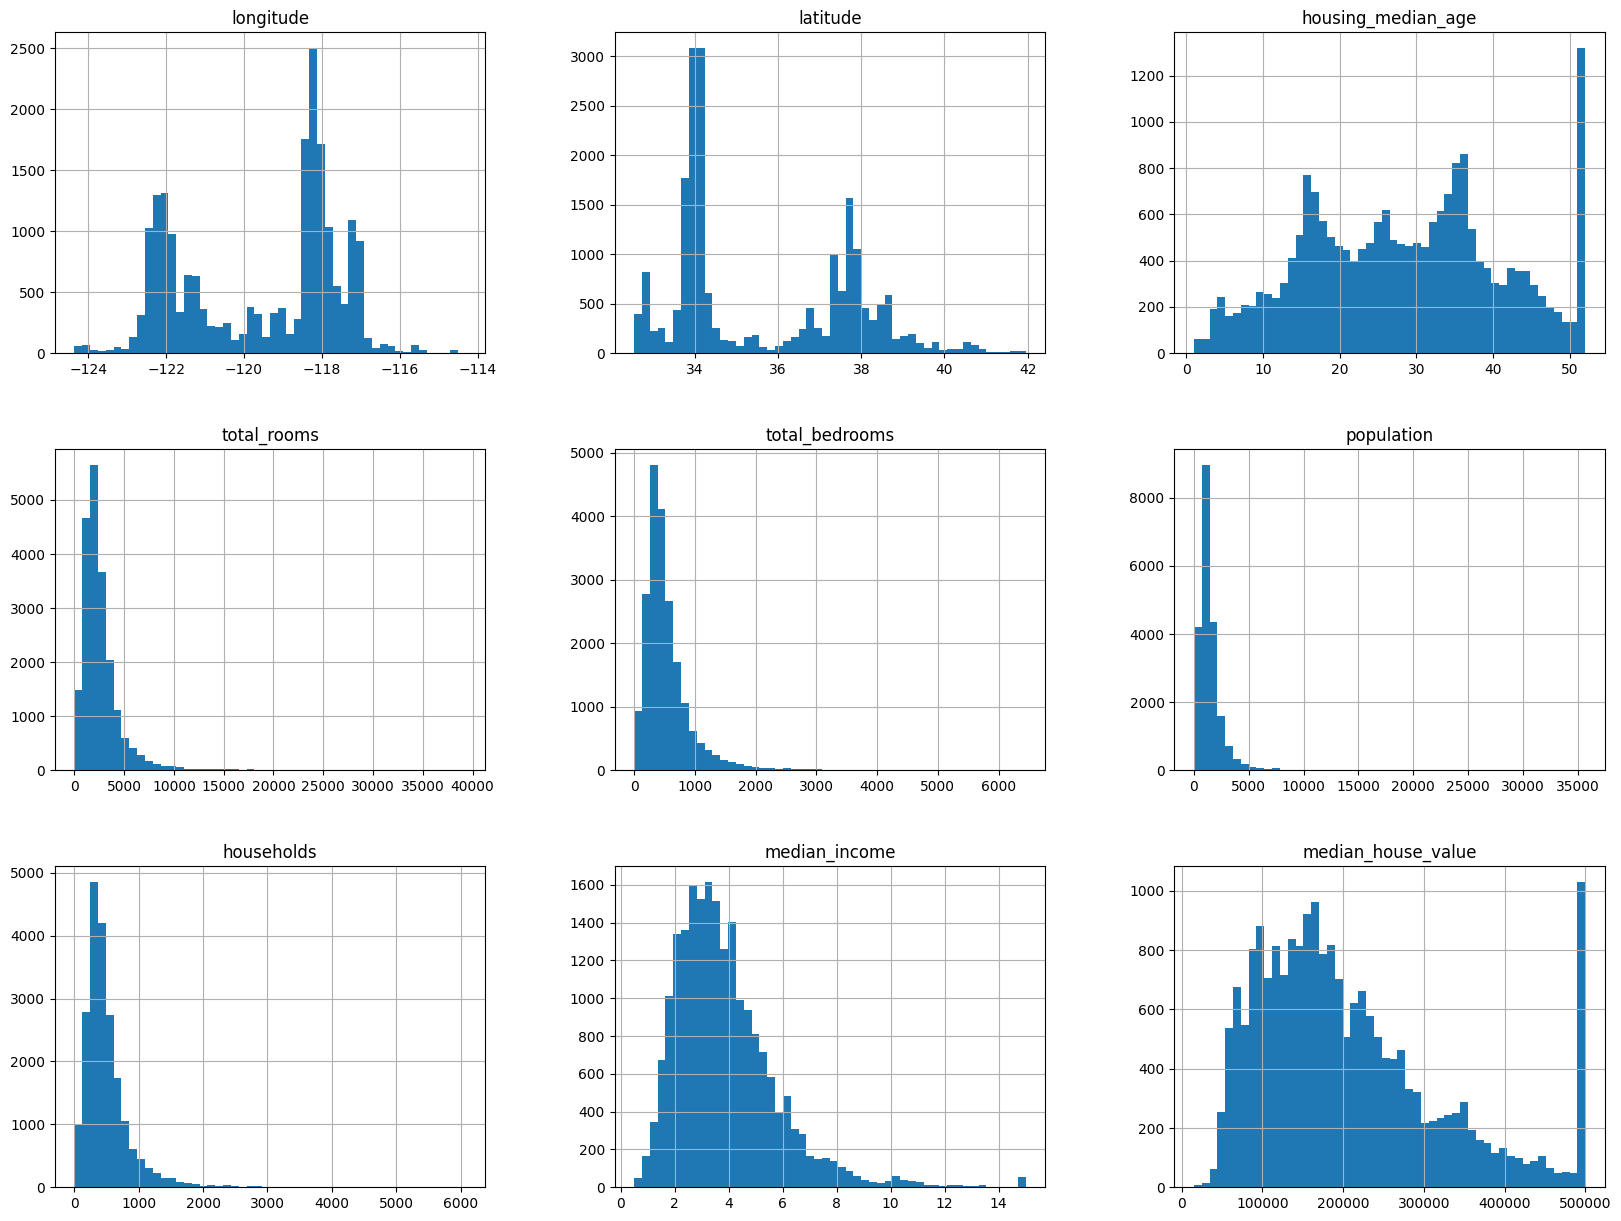

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15))
plt.show()

- Plot the histogram for all numerical attributes

- The median_income attributes calculates as tens of thousands of dollars: For instance: 3 means 30 000`$`
    - Because the min is 0.4999 and max is 15.0001, this means the data will be from 4 999`$` to maximum of 150 000`$`
- The housing_median_age and the median_house_value were also capped
    - When inputing this 2 data into a machine learning algorithm, the machine may understand that these two attributes can not excceed that limits

# Create a test set

In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

- Suppose that the median_income is an exetremly important attribute
- Therefore, when we doing sampling, to avoid sampling biases, we have to also consider the rate pf each category in the median income
- Since most of our income is from 1.5 to 6, we will be divine this into 5 interval (0,1.5,3,4.5,6,np.inf) 

<AxesSubplot: >

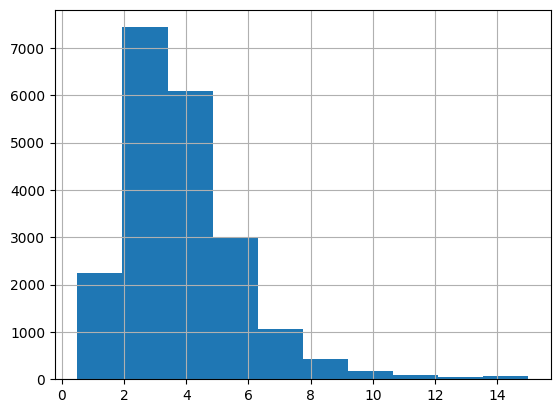

In [13]:
housing["median_income"].hist()

<AxesSubplot: >

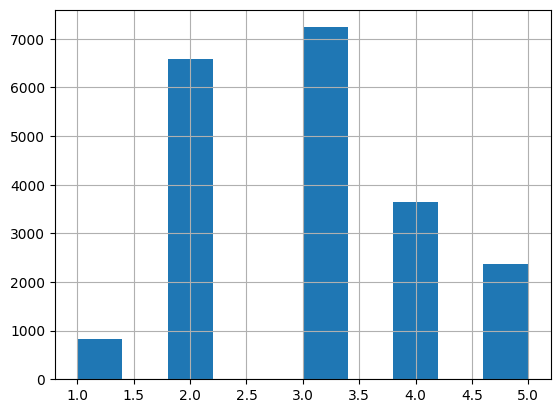

In [14]:
import numpy as np
# Creating a income_cat attribute for housing dataset
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
# Ploting the historgram of income_cat
housing["income_cat"].hist()

In [15]:
# We first sees the original data income_cat category proportions
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
# Stratifed sampling is sampling but keeps a specify attribute with the same proportion compare with the original dataset
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
# Check for the Stratified data income_cat  propotions
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [18]:
# This function helps calculates the proportions of income_cat from a dataset
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# This table is a comparions of proportions of the income_cat between different sampling techniques
compare_props = pd.DataFrame({
    # The original dataset
    "Overall": income_cat_proportions(housing),
    # The Stratified dataset (using StratifiedShuffleSplit)
    "Stratified": income_cat_proportions(strat_test_set),
    # The Random dataset (using train_test_split)
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [19]:
# Drop the Income_cat columns in the 2 strat trainging and testing sets because we won't need it
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

# Visualizing data for insights

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

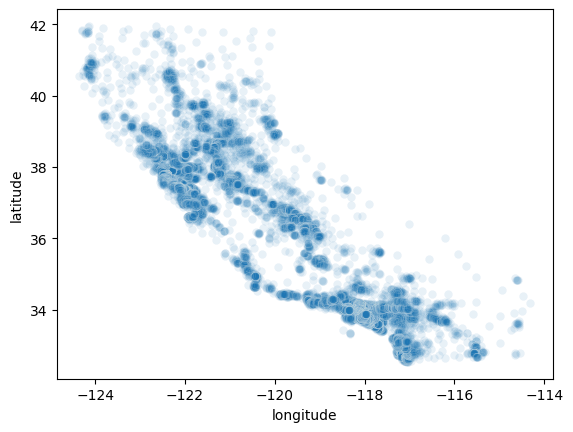

In [20]:
# The scatterplot
import seaborn as sns
sns.scatterplot(data=housing, x = 'longitude', y = 'latitude', alpha = 0.1) 
# Setting alpha = 0.1 make it easier to locate the place with high density

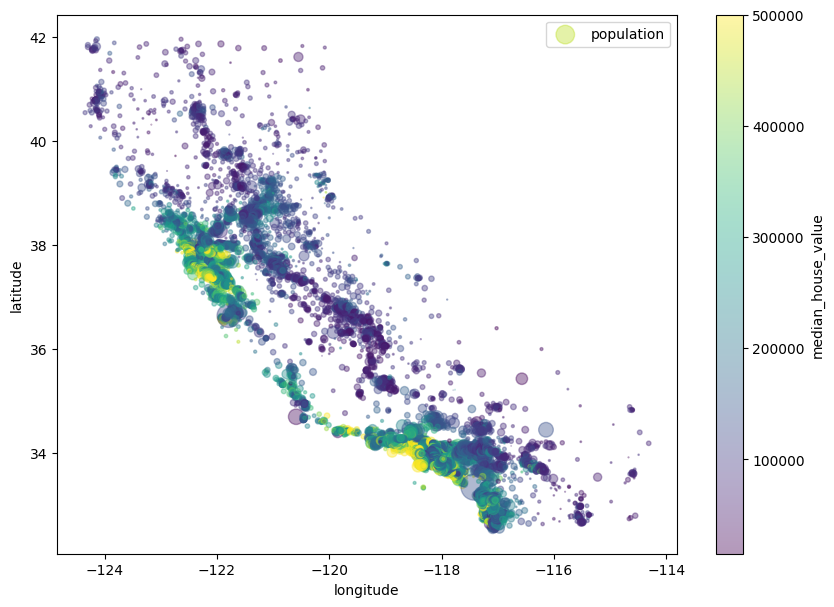

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", colorbar=True,
             sharex=False)
plt.legend()


# Looking for correlation

<AxesSubplot: >

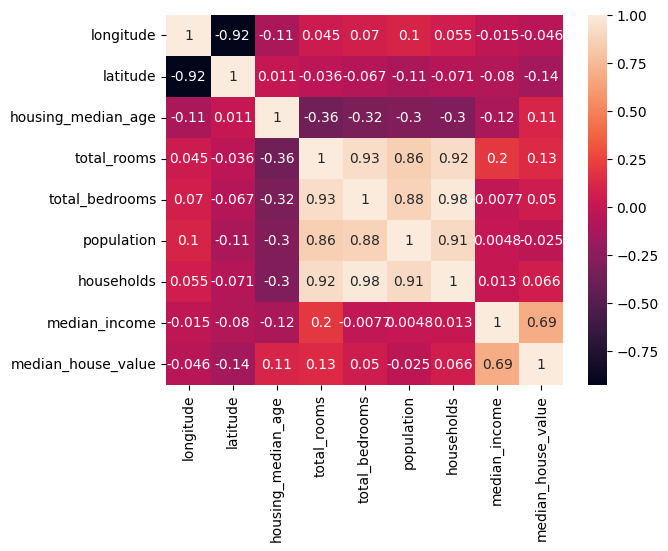

In [22]:
# Import necessary libraries
import seaborn as sns

# We have to remove all the object columns
columns_to_include = housing.drop(['income_cat', 'ocean_proximity'], axis=1)

# Calculate correlation matrix
correlation_matrix = columns_to_include.corr()

# Plot heatmap with annotations
sns.heatmap(correlation_matrix, annot=True)


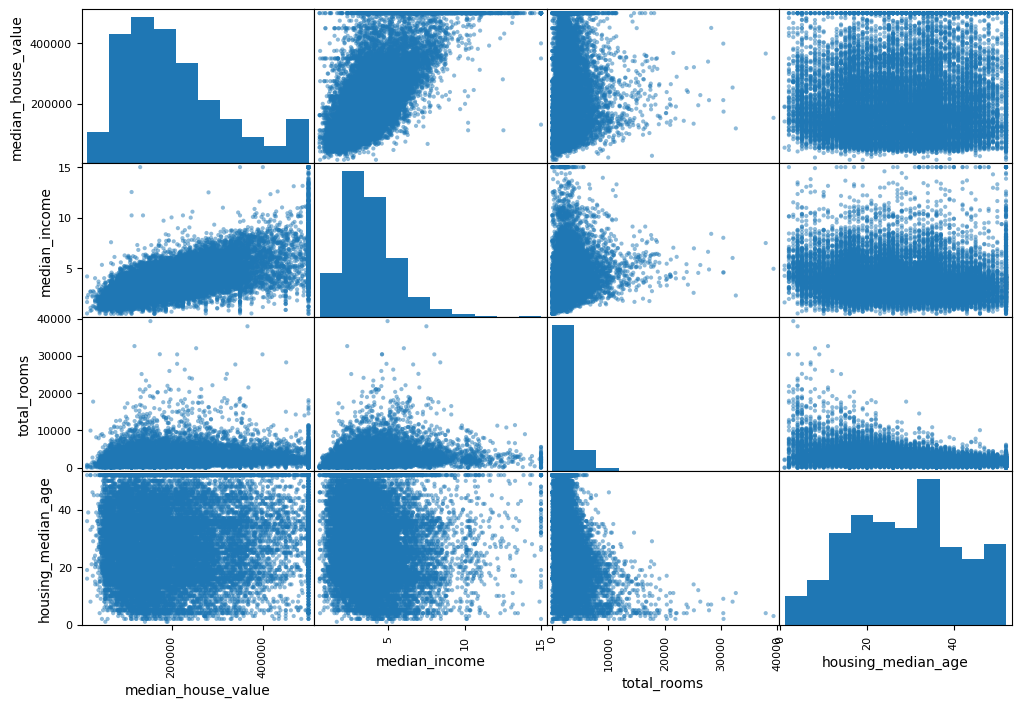

In [23]:
from pandas.plotting import scatter_matrix
# Since there are so many attributes from our dataset, we only draw a few importants attributes graphs
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

- To predict house values, the attributes that seems to have the highest correlation is median_income
- Therefore we will zoom in this plot

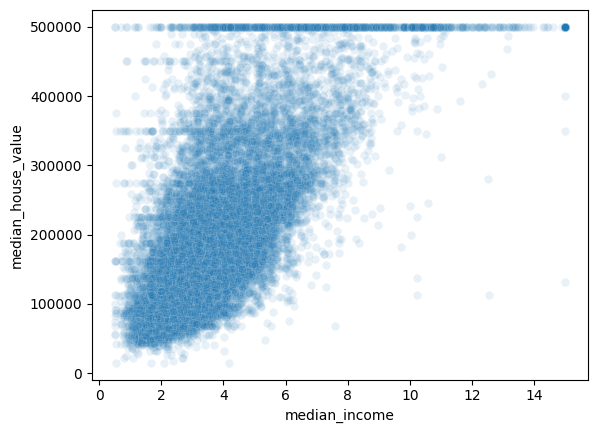

In [24]:
sns.scatterplot(data=housing, x = 'median_income', y ='median_house_value', alpha = 0.1)
plt.show()

# Experimenting attribute combination

- When looking at the correlation heatmap diagram, we can see a few other attributes that have strong correlation with each other:
    - total_rooms & total_bedrooms (0.93)
    - total_rooms & population (0.92)
    - total_rooms & household (0.86)
    - total_bedrooms & population (0.88)
    - total_bedrooms & households (0.98)
    - population & households (0.91)
- Therefore, we gonna try all of these combinations to maybe help improve the model

In [25]:
# Calculate rooms per household
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

# Calculate bedrooms per room
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

# Calculate population per household
housing["total_rooms_per_household"] = housing["population"] / housing["total_rooms"]

# Calculate total bedrooms per population
housing["total_bedrooms_per_population"] = housing["total_bedrooms"] / housing["population"]

# Calculate total bedrooms per household
housing["total_bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"]

# Calculate population per households
housing["population_per_households"] = housing["population"] / housing["households"]


In [26]:
# Import necessary libraries
import seaborn as sns

# We have to remove all the object columns
columns_to_include = housing.drop(['income_cat', 'ocean_proximity'], axis=1)

# Calculate correlation matrix
correlation_matrix = columns_to_include.corr()

# Plot heatmap with annotations
# sns.heatmap(correlation_matrix, annot=True)

correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value               1.000000
median_income                    0.688075
rooms_per_household              0.151948
total_rooms                      0.134153
housing_median_age               0.105623
total_bedrooms_per_population    0.069896
households                       0.065843
total_bedrooms                   0.049686
population_per_households       -0.023737
population                      -0.024650
total_rooms_per_household       -0.033557
longitude                       -0.045967
total_bedrooms_per_household    -0.046739
latitude                        -0.144160
bedrooms_per_room               -0.255880
Name: median_house_value, dtype: float64

- There are 2 good results:
    - The rooms_per_household have higher correlation compare to total_rooms or household alone
    - The total_bedrooms_per_population have higher correlation compare to total_bedrooms or population alone

# Prepare for Machine Learning Algorithm

In [39]:
# We will be using the straintified traning set
# We need to split the dependence and independence attributes into 2 separate sets
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

In [66]:
# Display again all the Null values of each attributes
housing.isnull().sum()
# Percentage of null values compare with the whole dataset
print(housing.isnull().sum() / len(housing) * 100)

longitude             0.00000
latitude              0.00000
housing_median_age    0.00000
total_rooms           0.00000
total_bedrooms        0.95688
population            0.00000
households            0.00000
median_income         0.00000
ocean_proximity       0.00000
dtype: float64


In [29]:
housing_labels.isnull().sum()

0

- There are 3 ways to resolve this solution:
    - We can get rid of the corresponding districts.
    - We can get rid of the whole attribute.
    - We can set the values to some value (zero, the mean, the median, etc.).
- Since the number of Null values is small (0.95%) we can get rid of the corresponding districts (generally the corresponding rows)

In [30]:
# Drop the corresponding districts
housing = housing.dropna(subset=["total_bedrooms"])

In [60]:
# Demonstration if we choose to replace the Nan values with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# Remove the text attributes because median can only be calculated on numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

In [61]:
# Fitting the data that contains NaN values into the imputer
imputer.fit(housing_num)
# Returns the median of all attributes
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [62]:
# Check if the result is the same as calculating the median of all numerical attributes
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [63]:
# Now we can transform the training set by replacing the NaN values with the median
X = imputer.transform(housing_num) # X is a numpy array
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [64]:
# Shows the strategy of the imputer:
imputer.strategy

'median'

In [46]:
# Concatinate back the ocean_proximity columns
housing_tr['ocean_proximity'] = housing['ocean_proximity']

# Handling Text and Categorical Attributes

In [47]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [48]:
# Since most ML algorithm prefers to work with numbers, we will be using OridinalEconder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [49]:
# An alternative option is using the LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
housing_cat_encoded = housing_cat.apply(LabelEncoder().fit_transform)
housing_cat_encoded[:10]

,ocean_proximity
12655,1
15502,4
2908,1
14053,4
20496,0
1481,3
18125,0
5830,0
17989,0
4861,0


In [50]:
# Display the categories of the ordinal_encoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- Because of the datatype of ocean_proximity is quantitative ordinal scale, meaning the the distance meaning categories 0 and 4 are clearly more similar than categories 0 and 1)
- Therefore we have to use a binary encoder (OneHotEncoder)

In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse = False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [158]:
# Display the categories of the OneHotEncoder
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Creating a data pipeline

In [73]:
# Create a transformer for Attributes Combinations
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        total_bedrooms_per_population = X[:,bedrooms_ix] / X[:, population_ix]
        total_bedrooms_per_household = X[:,bedrooms_ix] / X[:, households_ix]
        population_per_households =X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room == True:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household,total_bedrooms_per_population,
                        total_bedrooms_per_household,population_per_households]

# Testing the function CombinedAttributesAdder
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [76]:
# Since housing_extra_attribs is a np array, we can transform it into a dataframe
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household","total_bedrooms_per_population",
                        "total_bedrooms_per_household","population_per_households"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,total_bedrooms_per_population,total_bedrooms_per_household,population_per_households
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555,0.356281,1.128895,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698,0.424318,1.113281,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333,0.464768,1.033333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213,0.577951,1.074534,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241,0.35166,1.113793,3.167241


In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Creating the pipline for numerical data

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # Replace NaN values with median
        ('attribs_adder', CombinedAttributesAdder()), # Create combinations of attributes
        ('std_scaler', StandardScaler()), # A Feature scaler, Which standarize the features into the same scale
    ])


# This pipeline only works with numerical data only
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [161]:
from sklearn.compose import ColumnTransformer

# Creating another pipline for categorical data

cat_pipeline = Pipeline([
    ('OneHotEncoder', OneHotEncoder()) # uses to endcode the categories into binary
])

# Combining 2 pipelines
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# The ColumnTransformer can be uses to combine pipelines
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [87]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [88]:
housing_prepared.shape

(16512, 16)

# Select and Train Model

## Training and Evaluating on the Training set

In [112]:
# We will be using the Linear Regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

# Fitting the data into the Model
lin_reg.fit(housing_prepared, housing_labels)
# Creating a prediction variable
housing_predictions = lin_reg.predict(housing_prepared)
# Conducting a RMSE 
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
lin_rmse

68627.87390018745

In [121]:
# We will do the Decision Tree model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
# Fitting the model
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
# Calculating the RMSE
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
# There is no error, meaning there is a high chance of overfitting the data
# We will check this latter in cross validation
tree_rmse

0.0

In [129]:
# We will also do random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Fitting the model
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
# Calculating the RMSE
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)

forest_rmse

18650.698705770003

In [127]:
# We will also do SVM (SVR)
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
# Fitting the model
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
# Calculating the RMSE
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)

svm_rmse

111095.06635291968

## Cross validation

- Since our decision tree model may be overfit, we use cross validation to check if this is true
- We split the original training dataset into  10 distinct small training dataset (folds)

In [131]:
# A display scores function
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [130]:
from sklearn.model_selection import cross_val_score
# Cross validation for decision tree
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # Since the cross validation function expects a utility fuction (higher is better)
                                    # rather than a cost function(lower is better) therefore the scores contains the negative of RMSE

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [120]:
# Cross validation for linear regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


In [126]:
# Cross validation for random forest
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [128]:
# Cross validation for SVR
from sklearn.model_selection import cross_val_score

SVR_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
SVR_rmse_scores = np.sqrt(-SVR_scores)
display_scores(SVR_rmse_scores)

Scores: [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593]
Mean: 111814.1069260169
Standard deviation: 2600.8402690892553


- OveraLL:
    - Linear Regression did the best, and since the score from cross validation is not to far compare with the orignial evaluation, Linear Regression may no so bad overfitted
    - Random Forest did pretty good, but it stills get overfitted
    - Decision Tree perform really bad due to overfitting
    - SVM is not a good algorith all together because the score is too high

# Parameters Tunning

- Since the Decision Tree model is very promising, we will be tunning this model
- We will be using 2 methods of tunning: Gridsearch and RandomSearch

## Grid Search

In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [133]:
print("Best params: ", grid_search.best_params_)
print("Best Estimator: ",grid_search.best_estimator_)

Best params:  {'max_features': 8, 'n_estimators': 30}
Best Estimator:  RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [134]:
# Looking at the scores:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [136]:
# We can conduct the grid_search.cv_results_ as a DF as well
pd.DataFrame(grid_search.cv_results_)
# We need to Sqr the ['mean_test_score'] to get RMSE

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080197,0.008374,0.003801,0.000751,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.265923,0.023252,0.011202,0.001471,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.940635,0.095845,0.036201,0.005882,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.123797,0.008809,0.004001,0.001093,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.430129,0.044346,0.010803,0.001832,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,1.227326,0.127242,0.030985,0.005629,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.247608,0.178399,0.004603,0.001357,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.503984,0.005685,0.011003,0.002536,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.633156,0.117881,0.031403,0.002653,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.211509,0.013774,0.004802,0.001166,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


## Randomize search
- When the hyperparameters of the search space is large, it is preferable to use randomize search instead
- You can control the number of iterations, which helps you more control of your computing budget

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# We are choosing a n_estimator between 1:200, and max_features of 1:8 
# If we do GridSearch, we already have to do 200x8 combinations of hyparameters
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
# train accors 5 folds. meaning this would be 200*8*5 8000 rounds, but since our n_iter is set to 10, we only do 10*5 rounds
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000251F685F190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000251F685FF70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [138]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [139]:
print("Best params: ", rnd_search.best_params_)
print("Best Estimator: ",rnd_search.best_estimator_)

Best params:  {'max_features': 7, 'n_estimators': 180}
Best Estimator:  RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)


# Analyzing the result 

In [162]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# Get the OneHotEncoder transformer from the cat_pipeline
cat_encoder = full_pipeline.named_transformers_["cat"].named_steps['OneHotEncoder']

# Get the categories from the OneHotEncoder transformer
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

# Evaluate the System on the Test set

In [164]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Preprocessing the test data
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared = False)
final_rmse 

47873.26095812988

In [169]:
# Computing the interval
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
m = len(squared_errors)
mean = squared_errors.mean()

# Using the z-score 
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

# Using the t-score
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)

(45893.9540110131, 49773.921030650374)